# Исследовательский анализ данных

## Анализ данных

### Установка пакетов

In [1]:
import sys

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install --upgrade Pillow
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 2.1 MB 2.1 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/50/e5/0d484d1ac71b934638f91b7156203ba5bf3eb12f596b616a68a85c123808/Pillow-10.0.0-cp39-cp39-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Obtaining dependency information for ydata-profiling[notebook] from https://files.pythonhosted.org/packages/37/5e/c9bf58d7a5422001355bb26bfc3a73fc2454f44766c63ac1258e932eb78a/ydata_profiling-4.3.2-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing me

### Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

from ydata_profiling import ProfileReport

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Загрузка и первичный анализ данных

In [3]:
df = pd.read_csv('/datasets/faces/labels.csv')

In [4]:
profile = ProfileReport(df, title="Faces")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [6]:
df.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


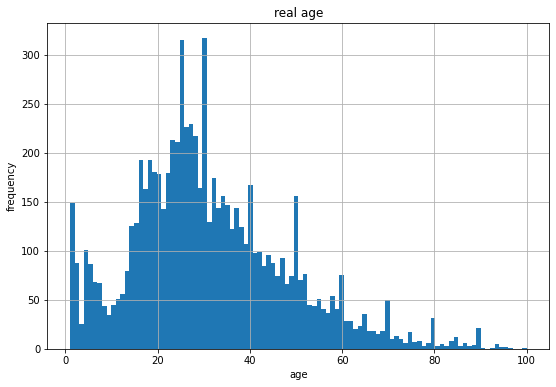

In [7]:
df['real_age'].hist(bins=100, figsize=(9,6))
plt.grid(True)
plt.title('real age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

<AxesSubplot:>

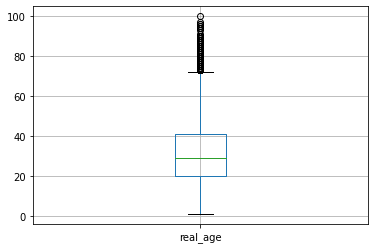

In [8]:
df.boxplot(column=['real_age'])

### Изображения

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=10,
        class_mode='raw',
        seed=2707) 

Found 7591 validated image filenames.


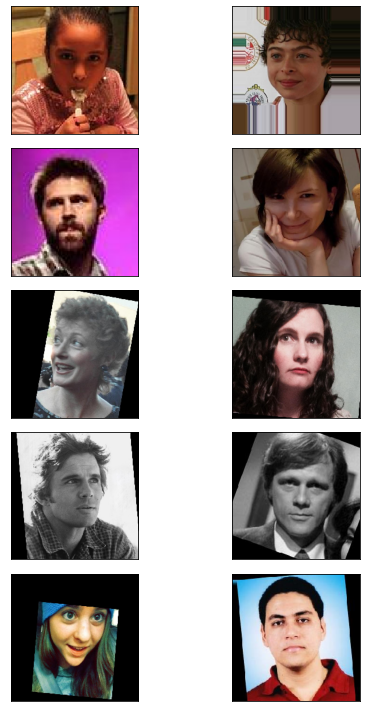

In [32]:
first_look = train_gen_flow[0][0]

fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(5, 2, i+1)
    plt.imshow(first_look[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

### Выводы

- датасет содержит 7591 изображение, классифицированное по возрасту от 1 года до 100 лет
- датасет не имеет пропусков
- датасет не имеет аномалий или неадекватных значений
- явный перекос в сторону меньшего возраста (среднее - 31 год) скорее всего связано с тем, что это фотографии из соцсетей
- пик на графике для класаа "1 год" связан с тем, что вероятно, дети в возрасте меньше года также туда попадают
- в целом - младенцев чаще фотографируют и выкладывают их фотографии, чем младших школьников, что вполне понятно
- характерные пики в районе 30, 40, 50, 60, 70, 80, 90 лет объясняются тем, что люди чаще фотографируются и выкладывают фотографии знаменательных дат (юбилеев). Пик 25 лет - это скорее всего окончание университета.
- **можно ожидать, что нейросеть, обученная на таком датасете, хорошо научится определять возраст молодых людей, а также, возможно, будет стремиться округлить возраст до кратного 10 числа**

### Keras, на основе ResNet50

###  ???